In [4]:
import math
from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

from alive_progress import alive_bar

%load_ext autoreload
%autoreload 2
    
R = 5
r = 2.5
    
def torus_point(theta, phi):
    return [(r*math.cos(theta)+R)*math.cos(phi), (r*math.cos(theta)+R)*math.sin(phi), r*math.sin(theta)]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


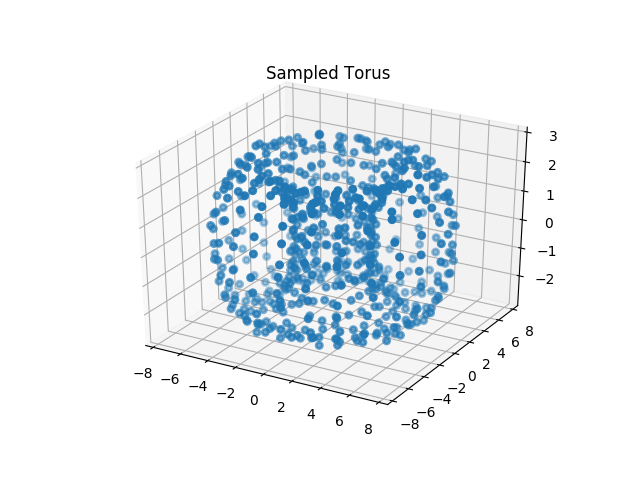

In [5]:
list_traj = []
N=25
xs = []
ys = []
zs = []
for i in range(N):
    for j in range(N):
        coords = torus_point(2*i*math.pi/N, 2*j*math.pi/N)
        list_traj.append(coords)
list_traj = np.matrix(list_traj)
sigma=0.1
list_traj = np.add(list_traj, sigma*np.random.randn(N*N,3))

for i in range(N*N):
    xs.append(list_traj[i,0])
    ys.append(list_traj[i,1])
    zs.append(list_traj[i,2])

ax = plt.figure().add_subplot(projection='3d')
#ax.set_xlabel("X Axis")
#ax.set_ylabel("Y Axis")
#ax.set_zlabel("Z Axis")
ax.set_title("Sampled Torus")
ax.scatter(xs, ys, zs, lw=2)
plt.show()

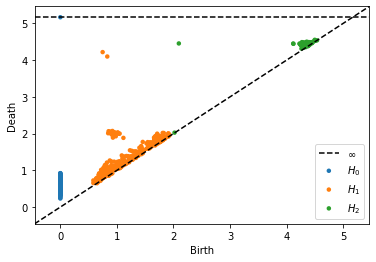

In [8]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

dgms = ripser(list_traj, maxdim=2)['dgms']
plt.clf()
#plt.title('Persistence dgm')
plot_diagrams(dgms, show = True)